# **0.0 下準備**
## **0.1 ライブラリのインポート**

In [130]:
# 必要なライブラリのインポート

import pandas as pd
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.optimize import minimize
import cvxpy as cp

### **0.1.1 Tickerリスト作成**

In [159]:
# ターゲットとなる企業のティッカーと企業名のリスト
all_tickers = [
    "1925", "1928", "2413", "2502", "2503", "2802", "2914", "3382", "3402", "3407", "4063", "4188", "4452", "4502", "4503", "4507", "4519", "4523", "4528", "4543", "4568", "4578", "4661", "4689", "4901", "4911", "5020", "5108", "5401", "5713", "5802", "6098", "6178", "6273", "6301", "6326", "6367", "6501", "6502", "6503", "6586", "6594", "6645", "6702", "6752", "6758", "6861", "6869", "6902", "6920", "6954", "6971", "6981", "7011", "7201", "7203", "7267", "7269", "7270", "7309", "7733", "7741", "7751", "7832", "7974", "8001", "8002", "8031", "8035", "8053", "8058", "8113", "8267", "8306", "8308", "8309", "8316", "8411", "8591", "8604", "8630", "8697", "8725", "8750", "8766", "8801", "8802", "8830", "9020", "9021", "9022", "9101", "9202", "9432", "9433", "9434", "9735", "9843", "9983", "9984", "TOPIX100", '1475'
]
# TOPIX100の銘柄のティッカーシンボルリストへの変換
all_tickers = [tickers + '.T' for tickers in all_tickers]
print(all_tickers)

['1925.T', '1928.T', '2413.T', '2502.T', '2503.T', '2802.T', '2914.T', '3382.T', '3402.T', '3407.T', '4063.T', '4188.T', '4452.T', '4502.T', '4503.T', '4507.T', '4519.T', '4523.T', '4528.T', '4543.T', '4568.T', '4578.T', '4661.T', '4689.T', '4901.T', '4911.T', '5020.T', '5108.T', '5401.T', '5713.T', '5802.T', '6098.T', '6178.T', '6273.T', '6301.T', '6326.T', '6367.T', '6501.T', '6502.T', '6503.T', '6586.T', '6594.T', '6645.T', '6702.T', '6752.T', '6758.T', '6861.T', '6869.T', '6902.T', '6920.T', '6954.T', '6971.T', '6981.T', '7011.T', '7201.T', '7203.T', '7267.T', '7269.T', '7270.T', '7309.T', '7733.T', '7741.T', '7751.T', '7832.T', '7974.T', '8001.T', '8002.T', '8031.T', '8035.T', '8053.T', '8058.T', '8113.T', '8267.T', '8306.T', '8308.T', '8309.T', '8316.T', '8411.T', '8591.T', '8604.T', '8630.T', '8697.T', '8725.T', '8750.T', '8766.T', '8801.T', '8802.T', '8830.T', '9020.T', '9021.T', '9022.T', '9101.T', '9202.T', '9432.T', '9433.T', '9434.T', '9735.T', '9843.T', '9983.T', '9984.T',

### **0.1.2 企業名リスト**

In [157]:
def get_company_names(all_tickers):
    company_names = []
    
    for ticker in all_tickers:
        try:
            company_info = yf.Ticker(ticker)
            company_names.append(company_info.info["shortName"])
        except:
            company_names.append(None)  # エラーが発生した場合は None をリストに追加
    
    return company_names

company_names = get_company_names(all_tickers)
print(company_names)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'Japan Post Holdings Co Ltd', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


### **0.1.3 Ticker-企業名の辞書作成**

In [133]:
def get_ticker_to_name_mapping(all_tickers):
    ticker_to_name = {}
    
    for ticker in all_tickers:
        try:
            company_info = yf.Ticker(ticker)
            company_name = company_info.info["shortName"]
            ticker_to_name[ticker] = company_name
        except:
            # エラーが発生した場合は None としてマッピングに追加
            ticker_to_name[ticker] = None
    
    return ticker_to_name

ticker_to_name = get_ticker_to_name_mapping(all_tickers)
print(ticker_to_name)

{'1925.T': 'DAIWA HOUSE INDUSTRY CO', '1928.T': 'SEKISUI HOUSE', '2413.T': 'M3 INC', '2502.T': 'ASAHI GROUP HLDGS', '2503.T': 'KIRIN HOLDINGS COMPANY LIMITED', '2802.T': 'AJINOMOTO CO INC', '2914.T': 'JAPAN TOBACCO INC', '3382.T': 'SEVEN & I HOLDINGS CO LTD', '3402.T': 'TORAY INDUSTRIES INC', '3407.T': 'ASAHI KASEI CORP', '4063.T': 'SHIN-ETSU CHEMICAL CO', '4188.T': 'MITSUBISHI CHEMICAL GROUP CORP', '4452.T': 'KAO CORP', '4502.T': 'TAKEDA PHARMACEUTICAL CO LTD', '4503.T': 'ASTELLAS PHARMA', '4507.T': 'SHIONOGI & CO', '4519.T': 'CHUGAI PHARMACEUTICAL CO', '4523.T': 'EISAI CO', '4528.T': 'ONO PHARMACEUTICAL CO', '4543.T': 'TERUMO CORP', '4568.T': 'DAIICHI SANKYO COMPANY LIMITED', '4578.T': 'OTSUKA HLDGS CO LTD', '4661.T': 'ORIENTAL LAND CO', '4689.T': 'LY CORPORATION', '4901.T': 'FUJIFILM HOLDINGS CORPORATION', '4911.T': 'SHISEIDO COMPANY LIMITED', '5020.T': 'ENEOS HOLDINGS INC', '5108.T': 'BRIDGESTONE CORP', '5401.T': 'NIPPON STEEL CORPORATION', '5713.T': 'SUMITOMO METAL MINING CO', '58

## **0.2 株価データセットの作成**

### **0.2.1 月次株価データの作成**

In [134]:
# 定数の設定
YEARS_BACK = 10  # 取得するデータの期間を10年とする
INTERVAL = "1mo"  # 取得するデータの間隔を月次とする。変更可能な値は"1mo", "1wk", "1d"

In [135]:
# 期間の計算
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=YEARS_BACK)

# 結果を格納するDataFrameの初期化
result_df = pd.DataFrame()

for ticker in all_tickers:
    try:
        # データの取得
        data = yf.download(ticker, start=start_date, end=end_date, interval=INTERVAL)
        
        # データの終値を結果のDataFrameに追加
        result_df[ticker] = data["Close"]
    except Exception as e:
        print(f"Error fetching data for {ticker}. Error: {e}")

# Dateを1列目に設定
result_df.reset_index(inplace=True)

# CSVに保存
csv_filename = f"/Users/klynoaguilar/Desktop/01_school/Zemi/23_10_20_weeek-02/topix100_{INTERVAL}_data.csv"
result_df.to_csv(csv_filename, index=False)

print("Data fetching and saving completed!" + ticker)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/3328580087.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[ticker] = data["Close"]


[*********************100%%**********************]  1 of 1 completed
Data fetching and saving completed!1475.T


/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/3328580087.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[ticker] = data["Close"]
/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/3328580087.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df.reset_index(inplace=True)


### **0.2.2 週次株価データの作成**

In [136]:
# 定数の設定
YEARS_BACK = 3  # 取得するデータの期間を10年とする
INTERVAL = "1wk"  # 取得するデータの間隔を月次とする。変更可能な値は"1mo", "1wk", "1d"

In [137]:
# 期間の計算
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=YEARS_BACK)

# 結果を格納するDataFrameの初期化
result_df = pd.DataFrame()

for ticker in all_tickers:
    try:
        # データの取得
        data = yf.download(ticker, start=start_date, end=end_date, interval=INTERVAL)
        
        # データの終値を結果のDataFrameに追加
        result_df[ticker] = data["Close"]
    except Exception as e:
        print(f"Error fetching data for {ticker}. Error: {e}")

# Dateを1列目に設定
result_df.reset_index(inplace=True)

# CSVに保存
csv_filename = f"/Users/klynoaguilar/Desktop/01_school/Zemi/23_10_20_weeek-02/topix100_{INTERVAL}_data.csv"
result_df.to_csv(csv_filename, index=False)

print("Data fetching and saving completed!" + ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/28318566.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[ticker] = data["Close"]


[*********************100%%**********************]  1 of 1 completed
Data fetching and saving completed!1475.T


/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/28318566.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[ticker] = data["Close"]
/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/28318566.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df.reset_index(inplace=True)


### **0.2.3 データの確認と読み込み**

In [138]:
all_df_monthly = pd.read_csv("./topix100_monthly_data.csv")
all_df_weekly = pd.read_csv('./topix100_weekly_data.csv')

#### **0.2.3.1 データ表示範囲の変更**

In [139]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### **0.2.3.2 月次データ確認**

In [140]:
all_df_monthly

,Date,1925.T,1928.T,2413.T,2502.T,2503.T,2802.T,2914.T,3382.T,3402.T,3407.T,4063.T,4188.T,4452.T,4502.T,4503.T,4507.T,4519.T,4523.T,4528.T,4543.T,4568.T,4578.T,4661.T,4689.T,4901.T,4911.T,5020.T,5108.T,5401.T,5713.T,5802.T,6098.T,6178.T,6273.T,6301.T,6326.T,6367.T,6501.T,6502.T,6503.T,6586.T,6594.T,6645.T,6702.T,6752.T,6758.T,6861.T,6869.T,6902.T,6920.T,6954.T,6971.T,6981.T,7011.T,7201.T,7203.T,7267.T,7269.T,7270.T,7309.T,7733.T,7741.T,7751.T,7832.T,7974.T,8001.T,8002.T,8031.T,8035.T,8053.T,8058.T,8113.T,8267.T,8306.T,8308.T,8309.T,8316.T,8411.T,8591.T,8604.T,8630.T,8697.T,8725.T,8750.T,8766.T,8801.T,8802.T,8830.T,9020.T,9021.T,9022.T,9101.T,9202.T,9432.T,9433.T,9434.T,9735.T,9843.T,9983.T,9984.T,TOPIX100.T,1475.T
0,2013-11-01,1990.0,1413.0,668.25,2804.0,1578.0,1460.0,3460.0,3770.0,724.000000,808.000000,5920.0,476.000000,3365.0,4975.0,1214.000000,2252.0,815.000000,4000.0,1552.0,1337.50,626.666687,2992.0,3772.50,494.000000,2797.0,1752.0,533.000000,3750.0,3320.000000,2726.0,1597.0,NaN,NaN,24660.0,2129.0,1751.0,6500.0,3775.0,4420.0,1183.0,2555.0,2472.50,4215.0,4770.0,1175.000000,1867.0,10287.50,3330.0,1282.50,239.75,17240.0,5420.0,978.888916,6570.0,936.000000,1276.000000,1443.333374,2630.0,2892.0,9100.0,861.25,2771.0,3410.0,2081.0,1313.0,1292.0,743.000000,1419.0,5550.0,1267.0,2015.0,2160.000000,1378.0,659.000000,508.000000,5030.0,5070.0,2150.0,1865.0,811.000000,2839.0,1367.5,2757.0,1605.0,1133.333374,3475.0,2844.0,4855.0,8390.0,4480.0,2464.0,1056.666626,2070.0,51.400002,2143.333252,NaN,6320.0,4745.0,12933.333008,4145.0,NaN,NaN
1,2013-12-01,2035.0,1470.0,658.75,2964.0,1513.0,1522.0,3420.0,4180.0,728.000000,824.000000,6140.0,486.000000,3310.0,4825.0,1246.000000,2280.0,775.000000,4075.0,1842.0,1267.50,641.000000,3040.0,3792.50,585.000000,2981.0,1691.0,541.000000,3980.0,3520.000000,2754.0,1754.0,NaN,NaN,26500.0,2137.0,1739.0,6550.0,3980.0,4420.0,1320.0,2760.0,2575.00,4645.0,5440.0,1224.000000,1826.0,11250.00,3105.0,1387.50,254.50,19250.0,5250.0,1037.777832,6510.0,884.000000,1284.000000,1443.333374,2828.0,3015.0,9030.0,832.50,2922.0,3330.0,2334.0,1401.0,1299.0,756.000000,1465.0,5760.0,1321.0,2017.0,2000.000000,1425.0,694.000000,536.000000,5540.0,5420.0,2280.0,1847.0,809.000000,2924.0,1494.5,2822.0,1757.0,1171.666626,3785.0,3145.0,5230.0,8380.0,4560.0,2476.0,1120.000000,2100.0,56.599998,2156.666748,NaN,6340.0,4985.0,14466.666992,4600.0,NaN,NaN
2,2014-01-01,1964.0,1434.0,756.25,2813.0,1406.0,1454.0,3197.0,4102.0,677.000000,785.000000,5763.0,441.000000,3275.0,4793.0,1279.599976,2119.0,781.333313,3943.0,1786.0,1208.75,574.333313,3146.0,3898.75,584.000000,3027.0,1637.0,497.000000,3734.0,3150.000000,2690.0,1627.0,NaN,NaN,26025.0,2148.0,1598.0,5956.0,3960.0,4320.0,1178.0,2695.0,2881.25,4090.0,5780.0,1184.000000,1626.0,10627.50,2845.0,1334.75,274.75,16770.0,4651.0,1067.111084,6700.0,885.000000,1184.400024,1297.666626,2692.0,2847.0,9130.0,762.50,2843.0,3006.0,2330.0,1215.0,1265.0,723.000000,1385.0,5317.0,1290.0,1903.0,1873.333374,1289.0,623.000000,546.000000,4950.0,4824.0,2190.0,1590.0,725.000000,2711.0,1261.0,2412.0,1559.0,1011.333313,3289.0,2545.0,4592.0,7632.0,4226.0,2264.0,1070.000000,2180.0,55.610001,1901.666626,NaN,5830.0,4985.0,12703.333008,3781.5,NaN,NaN
3,2014-02-01,1846.0,1274.0,846.25,2852.0,1385.0,1577.0,3232.0,3813.0,701.000000,723.000000,5758.0,459.000000,3495.0,4872.0,1318.800049,2200.0,866.000000,3970.0,2014.0,1083.75,584.000000,3123.0,3817.50,645.000000,2924.0,1802.0,527.000000,3667.0,2970.000000,2660.0,1556.0,NaN,NaN,25815.0,2131.0,1423.0,5837.0,4015.0,4400.0,1205.0,2830.0,3122.50,4275.0,6340.0,1276.000000,1780.0,10917.50,3035.0,1360.00,273.00,17655.0,4591.0,1076.777832,6250.0,911.000000,1167.800049,1215.666626,2731.0,2753.0,9210.0,882.50,3016.0,3162.0,2277.0,1255.5,1264.0,713.000000,1564.0,5842.0,1342.0,1947.0,1923.333374,1244.0,587.000000,530.000000,4770.0,4540.0,2090.0,1500.0,687.000000,2569.0,1207.0,2408.0,1484.0,1004.000000,3027.0,2403.0,4093.0,7942.0,4170.0,2367.0,1083.333374,2270.0,57.009998,2067.000000,NaN,5737.0,4600

#### **0.2.3.3 週次データ確認**

In [141]:
all_df_weekly

,Date,1925.T,1928.T,2413.T,2502.T,2503.T,2802.T,2914.T,3382.T,3402.T,3407.T,4063.T,4188.T,4452.T,4502.T,4503.T,4507.T,4519.T,4523.T,4528.T,4543.T,4568.T,4578.T,4661.T,4689.T,4901.T,4911.T,5020.T,5108.T,5401.T,5713.T,5802.T,6098.T,6178.T,6273.T,6301.T,6326.T,6367.T,6501.T,6502.T,6503.T,6586.T,6594.T,6645.T,6702.T,6752.T,6758.T,6861.T,6869.T,6902.T,6920.T,6954.T,6971.T,6981.T,7011.T,7201.T,7203.T,7267.T,7269.T,7270.T,7309.T,7733.T,7741.T,7751.T,7832.T,7974.T,8001.T,8002.T,8031.T,8035.T,8053.T,8058.T,8113.T,8267.T,8306.T,8308.T,8309.T,8316.T,8411.T,8591.T,8604.T,8630.T,8697.T,8725.T,8750.T,8766.T,8801.T,8802.T,8830.T,9020.T,9021.T,9022.T,9101.T,9202.T,9432.T,9433.T,9434.T,9735.T,9843.T,9983.T,9984.T,TOPIX100.T,1475.T
0,2020-10-05,2878.0,1790.0,6870.0,3770.0,2000.0,2117.0,2002.0,3542.0,493.000000,926.400024,14135.0,613.599976,7769.0,3712.0,1500.5,5524.0,4594.0,9375.0,3320.0,4140.0,2890.5,4230.0,14990.0,767.000000,5212.0,6587.0,385.500000,3457.0,1087.5,3348.0,1206.0,4300.0,733.200012,58080.0,2436.0,1923.0,19190.0,3650.0,2840.0,1430.5,4960.0,10150.0,8120.0,14180.0,894.000000,7862.0,49520.0,10250.0,1213.75,9340.0,20440.0,6038.0,2289.333252,2316.0,381.500000,1393.400024,860.666687,4866.0,2083.0,21220.0,2231.5,12160.0,1697.0,7812.0,5813.0,2645.5,608.299988,1848.5,28430.0,1261.0,2551.5,4790.0,2804.0,430.600006,360.399994,2834.0,2999.0,1331.0,1387.5,486.000000,3762.0,2801.0,2832.0,1607.5,1589.666626,1861.5,1623.0,2981.5,6353.0,5016.0,2992.0,654.333313,2400.5,91.779999,2694.0,1197.0,9340.0,21665.0,23073.333984,6997.0,1045.469971,1684.0
1,2020-10-12,2836.0,1795.0,7140.0,3594.0,1931.0,2120.5,1996.5,3425.0,475.399994,910.099976,14175.0,612.400024,7724.0,3504.0,1488.5,5154.0,4319.0,8552.0,3243.0,3995.0,2702.5,4043.0,14905.0,758.000000,5466.0,6745.0,370.000000,3325.0,1066.0,3238.0,1136.5,4242.0,734.400024,57520.0,2415.0,1907.0,19255.0,3550.0,2750.0,1366.5,4860.0,10095.0,7600.0,13945.0,871.599976,7603.0,48950.0,10240.0,1197.25,9270.0,20080.0,6052.0,2402.000000,2202.0,371.899994,1365.800049,843.666687,4613.0,2020.5,20440.0,2085.0,12235.0,1646.0,7848.0,5792.0,2612.0,584.400024,1795.5,29015.0,1223.5,2457.0,5006.0,2838.5,419.600006,353.000000,2850.0,2952.5,1296.0,1334.0,487.200012,3817.0,2698.0,2903.5,1585.0,1606.666626,1875.0,1600.0,2884.5,6150.0,4906.0,2855.0,633.333313,2368.5,89.760002,2764.5,1215.0,9039.0,22065.0,24476.666016,7023.0,1029.699951,1657.0
2,2020-10-19,2893.0,1773.5,6910.0,3566.0,1965.5,2088.0,1993.5,3430.0,498.899994,943.500000,14445.0,606.599976,7637.0,3500.0,1483.5,5059.0,4281.0,8330.0,3194.0,3905.0,2684.0,4070.0,15255.0,722.000000,5397.0,6881.0,367.399994,3618.0,1119.0,3458.0,1175.5,4244.0,741.599976,56770.0,2486.0,1953.0,19745.0,3650.0,2864.0,1365.5,4965.0,10600.0,7880.0,13655.0,894.299988,7820.0,48730.0,10020.0,1233.75,8850.0,21540.0,6091.0,2410.000000,2370.0,387.899994,1394.599976,860.000000,4632.0,2096.5,20330.0,2027.0,11915.0,1730.5,7845.0,5503.0,2572.5,590.099976,1804.5,28450.0,1229.0,2457.5,5112.0,2714.0,425.799988,356.100006,2903.5,3002.0,1322.0,1325.0,497.799988,4011.0,2622.0,2980.5,1677.0,1629.333374,1881.5,1608.0,2955.5,5838.0,4877.0,2759.0,672.666687,2391.5,88.559998,2770.5,1200.0,8950.0,21380.0,24220.000000,7082.0,1036.439941,1664.0
3,2020-10-26,2735.5,1726.5,7027.0,3223.0,1879.0,2097.5,1970.0,3179.0,470.399994,900.400024,13890.0,586.200012,7420.0,3239.0,1435.0,4924.0,4021.0,8089.0,2972.0,3837.0,2748.0,3855.0,14585.0,725.099976,5318.0,6450.0,350.600006,3390.0,1006.5,3223.0,1145.5,3970.0,714.900024,55300.0,2341.0,1810.5,19480.0,3502.0,2629.0,1340.0,4600.0,10500.0,7500.0,12225.0,960.700012,8674.0,47250.0,9800.0,1209.50,9040.0,22050.0,5731.0,2422.333252,2234.5,366.000000,1360.599976,811.666687,4457.0,1905.5,23765.0,1989.0,11800.0,1800.5,7776.0,5698.0,2500.0,543.200012,1630.0,27900.0,1144.5,2325.5,4840.0,2663.5,410.200012,342.500000,2783.5,2881.0,1281.5,1215.5,464.500000,3891.0,2542.5,2844.5,1546.5,1553.000000,1774.5,1554.0,2787.0,5457.0,4460.0,2517.0,638.333313,2270.0,87.839996,2792.5,1212.5,8795.0,21550.0,24236.666016

# **1.0 データの確認と前処理**

## **1.1 データの欠損値確認**

### **1.1.1 monthlyの欠損値確認**

In [142]:
# monthlyのNaNを含む列とその数を出力
for col in all_df_monthly.columns:
    nan_count = all_df_monthly[col].isnull().sum()
    if nan_count > 0:
        print(f"Column '{col}' has {nan_count} NaN values.")

Column '6098.T' has 12 NaN values.
Column '6178.T' has 25 NaN values.
Column '9434.T' has 62 NaN values.
Column 'TOPIX100.T' has 76 NaN values.
Column '1475.T' has 24 NaN values.


### **1.1.2 weeklyの欠損値確認**

In [143]:
# WeeklyのNaNを含む列とその数を出力
for col in all_df_weekly.columns:
    nan_count = all_df_weekly[col].isnull().sum()
    if nan_count > 0:
        print(f"Column '{col}' has {nan_count} NaN values.")

In [144]:
print(len(all_df_weekly.columns))

103


## **1.2 データの分類**

### **1.2.1 月次/週次の市場データ作成**

In [145]:
market_df_monthly = all_df_monthly[['Date', 'TOPIX100.T', '1475.T']]
market_df_weekly = all_df_weekly[['Date', 'TOPIX100.T', '1475.T']]

In [160]:
all_df_columns = all_df_monthly.columns

### **1.2.2 月次/週次の業界別データ作成**

In [147]:
# tickerをそれに対応する企業名の確認
ticker_to_name

{'1925.T': 'DAIWA HOUSE INDUSTRY CO',
 '1928.T': 'SEKISUI HOUSE',
 '2413.T': 'M3 INC',
 '2502.T': 'ASAHI GROUP HLDGS',
 '2503.T': 'KIRIN HOLDINGS COMPANY LIMITED',
 '2802.T': 'AJINOMOTO CO INC',
 '2914.T': 'JAPAN TOBACCO INC',
 '3382.T': 'SEVEN & I HOLDINGS CO LTD',
 '3402.T': 'TORAY INDUSTRIES INC',
 '3407.T': 'ASAHI KASEI CORP',
 '4063.T': 'SHIN-ETSU CHEMICAL CO',
 '4188.T': 'MITSUBISHI CHEMICAL GROUP CORP',
 '4452.T': 'KAO CORP',
 '4502.T': 'TAKEDA PHARMACEUTICAL CO LTD',
 '4503.T': 'ASTELLAS PHARMA',
 '4507.T': 'SHIONOGI & CO',
 '4519.T': 'CHUGAI PHARMACEUTICAL CO',
 '4523.T': 'EISAI CO',
 '4528.T': 'ONO PHARMACEUTICAL CO',
 '4543.T': 'TERUMO CORP',
 '4568.T': 'DAIICHI SANKYO COMPANY LIMITED',
 '4578.T': 'OTSUKA HLDGS CO LTD',
 '4661.T': 'ORIENTAL LAND CO',
 '4689.T': 'LY CORPORATION',
 '4901.T': 'FUJIFILM HOLDINGS CORPORATION',
 '4911.T': 'SHISEIDO COMPANY LIMITED',
 '5020.T': 'ENEOS HOLDINGS INC',
 '5108.T': 'BRIDGESTONE CORP',
 '5401.T': 'NIPPON STEEL CORPORATION',
 '5713.T': 'S

In [148]:
ticker_to_name['8035.T']

'TOKYO ELECTRON'

In [149]:
# 建設・不動産
construction_real_estate = ['1925.T', '1928.T', '8801.T', '8802.T', '8830.T']
construction_real_estate_names = [ticker_to_name[ticker] for ticker in construction_real_estate]

# 食品・飲料
food_beverage = ['2502.T', '2503.T', '2802.T', '2914.T']
food_beverage_names = [ticker_to_name[ticker] for ticker in food_beverage]

# 小売
retail = ['3382.T', '8267.T', '9843.T', '9983.T']
retail_names = [ticker_to_name[ticker] for ticker in retail]

# 化学・製薬
chemicals_pharmaceuticals = ['3402.T', '3407.T', '4063.T', '4188.T', '4452.T', '4502.T', '4503.T', '4507.T', '4519.T', '4523.T', '4528.T', '4568.T', '4578.T', '4901.T', '8113.T', '4911.T']
chemicals_pharmaceuticals_names = [ticker_to_name[ticker] for ticker in chemicals_pharmaceuticals]

# 金融・保険
finance_insurance = ['8306.T', '8308.T', '8309.T', '8316.T', '8411.T', '8591.T', '8604.T', '8630.T', '8697.T', '8725.T', '8750.T', '8766.T']
finance_insurance_names = [ticker_to_name[ticker] for ticker in finance_insurance]

# 情報・通信
information_communication = ['4689.T', '9432.T', '9433.T', '9434.T', '9984.T']
information_communication_names = [ticker_to_name[ticker] for ticker in information_communication]

# 輸送・物流
transport_logistics = ['9101.T', '9202.T', '9020.T', '9021.T', '9022.T']
transport_logistics_names = [ticker_to_name[ticker] for ticker in transport_logistics]

# 資源
materials = ['5401.T', '5713.T', '5020.T', '5108.T']
materials_names = [ticker_to_name[ticker] for ticker in materials]

# 機械・電機
machinery_electronics = ['6301.T', '6326.T', '6367.T', '6501.T', '6502.T', '6503.T', '6586.T', '6594.T', '6645.T', '6702.T', '6752.T', '6758.T', '6861.T', '6902.T', '5802.T', '6869.T', '6920.T', '6971.T', '6981.T', '7011.T', '6273.T', '8035.T']
machinery_electronics_names = [ticker_to_name[ticker] for ticker in machinery_electronics]

# 自動車・輸送機器
automotive_transport_equipment = ['7201.T', '7203.T', '7267.T', '7269.T', '7270.T']
automotive_transport_equipment_names = [ticker_to_name[ticker] for ticker in automotive_transport_equipment]

# 商社
trading_companies = ['8001.T', '8002.T', '8031.T', '8053.T', '8058.T']
trading_companies_names = [ticker_to_name[ticker] for ticker in trading_companies]

# 健康・医療機器
healthcare_medical_equipment = ['4543.T', '6954.T', '7733.T', '7741.T', '7751.T', '2413.T']
healthcare_medical_equipment_names = [ticker_to_name[ticker] for ticker in healthcare_medical_equipment]

# サービス・エンターテインメント
services_entertainment = ['4661.T', '7309.T', '7832.T', '7974.T', '6098.T', '9735.T', '6178.T']
services_entertainment_names = [ticker_to_name[ticker] for ticker in services_entertainment]

# その他
markets = ['TOPIX100.T', '1475.T']
markets_names = [ticker_to_name[ticker] for ticker in markets]

In [155]:
all_tickers_by_industories = [
    construction_real_estate,
    food_beverage,
    retail,
    chemicals_pharmaceuticals,
    finance_insurance,
    information_communication,
    transport_logistics,
    materials, 
    machinery_electronics,
    automotive_transport_equipment,
    trading_companies,
    healthcare_medical_equipment,
    services_entertainment,
    markets
]

# Flatten the list of tickers
all_tickers = [ticker for sublist in all_tickers_by_industories for ticker in sublist]

# Count the total number of tickers
total_count = len(all_tickers)
print(total_count)
print(all_tickers)

102
['1925.T', '1928.T', '8801.T', '8802.T', '8830.T', '2502.T', '2503.T', '2802.T', '2914.T', '3382.T', '8267.T', '9843.T', '9983.T', '3402.T', '3407.T', '4063.T', '4188.T', '4452.T', '4502.T', '4503.T', '4507.T', '4519.T', '4523.T', '4528.T', '4568.T', '4578.T', '4901.T', '8113.T', '4911.T', '8306.T', '8308.T', '8309.T', '8316.T', '8411.T', '8591.T', '8604.T', '8630.T', '8697.T', '8725.T', '8750.T', '8766.T', '4689.T', '9432.T', '9433.T', '9434.T', '9984.T', '9101.T', '9202.T', '9020.T', '9021.T', '9022.T', '5401.T', '5713.T', '5020.T', '5108.T', '6301.T', '6326.T', '6367.T', '6501.T', '6502.T', '6503.T', '6586.T', '6594.T', '6645.T', '6702.T', '6752.T', '6758.T', '6861.T', '6902.T', '5802.T', '6869.T', '6920.T', '6971.T', '6981.T', '7011.T', '6273.T', '8035.T', '7201.T', '7203.T', '7267.T', '7269.T', '7270.T', '8001.T', '8002.T', '8031.T', '8053.T', '8058.T', '4543.T', '6954.T', '7733.T', '7741.T', '7751.T', '2413.T', '4661.T', '7309.T', '7832.T', '7974.T', '6098.T', '9735.T', '6178

# **2.0 データの基礎分析**

## **2.1 データの概要**

### **2.1.1 ヒストグラムの作成**

定数の確認

all_tickers → tickerコードの全て

all_df_columns → dfコラムの全て

all_df_monthly → 月次データ(10年分)

all_df_weekly → 週次データ(3年分)

ticker_to_name → tickerと企業名の辞書

#### **2.1.1.1 [関数]ヒストグラム作成**

In [170]:
"""
  10x10のグリッドにデータフレームのヒストグラムを描画します。

  Parameters:
  - dataframe: ヒストグラムを描画するデータフレーム
  - exclude_columns: ヒストグラムの対象から除外するカラムのリスト
  - max_columns: 表示するヒストグラムの最大数
  - figsize: プロットの全体サイズ
"""

def plot_histograms(
  dataframe, 
  exclude_columns=None, 
  max_columns=100, 
  figsize=(20,20)):

    # カラムのフィルタリング
    columns = [col for col in dataframe.columns if col not in exclude_columns]

    # 10 x 10のグリッドにヒストグラムを配置
    fig, axs = plt.subplots(10, 10, figsize=figsize)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # グラフ間のスペース調整

    for i, col in enumerate(columns[:max_columns]):
        ax = axs[i // 10, i % 10]
        ax.hist(dataframe[col])
        ax.set_title(col)

    # 使われていないAxesを非表示にする
    for i in range(len(columns), max_columns):
        axs[i // 10, i % 10].axis('off')

    plt.show()

#### **2.1.1.2 月次データのヒストグラム**

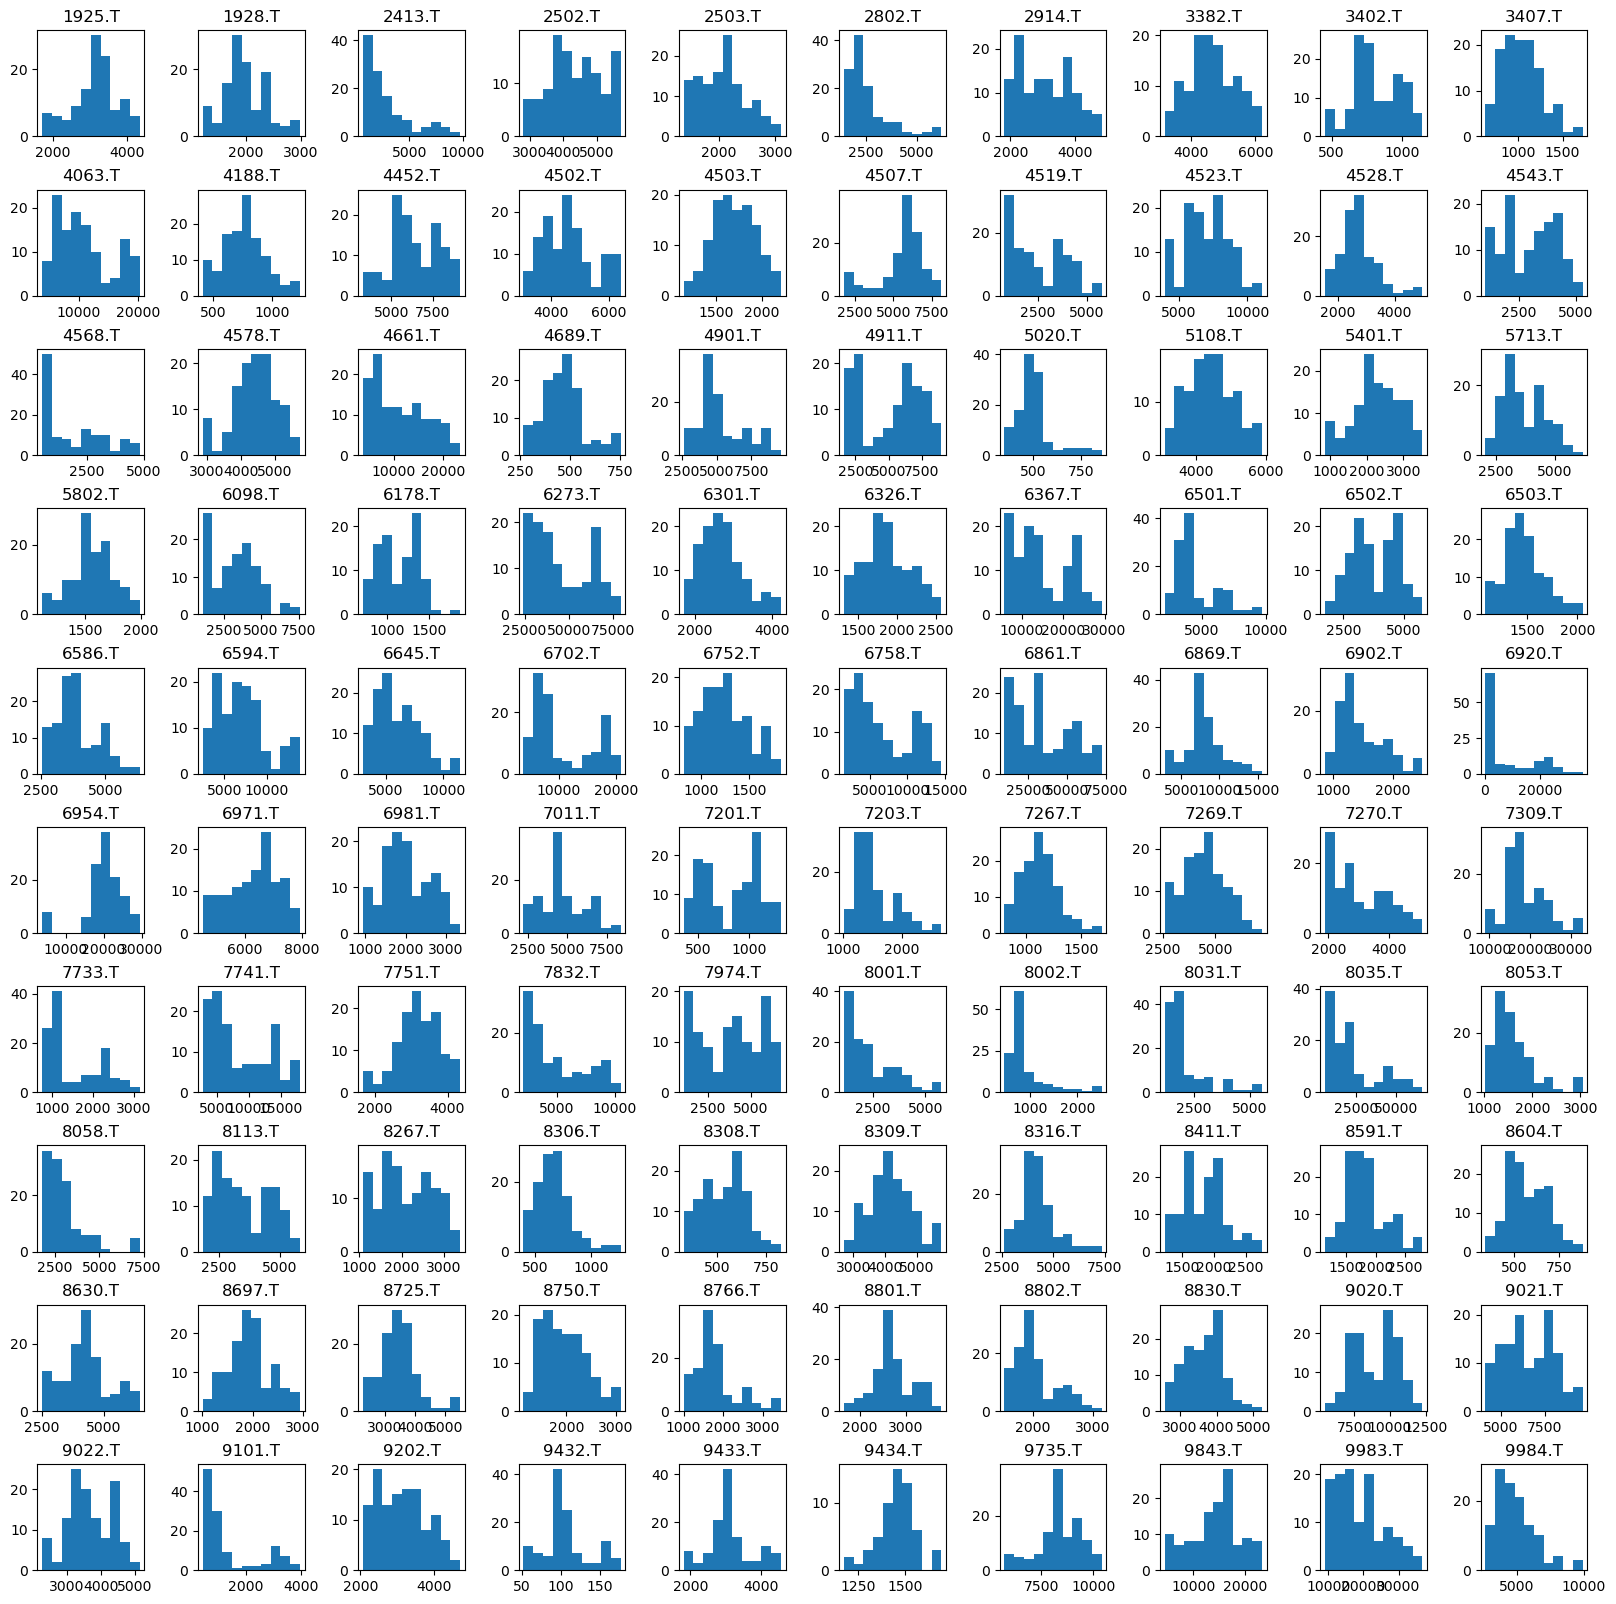

In [171]:
EXCLUDE_COLUMNS = ['Date'] + markets
plot_histograms(all_df_monthly, EXCLUDE_COLUMNS)

#### **2.1.1.3 週次データのヒストグラム**

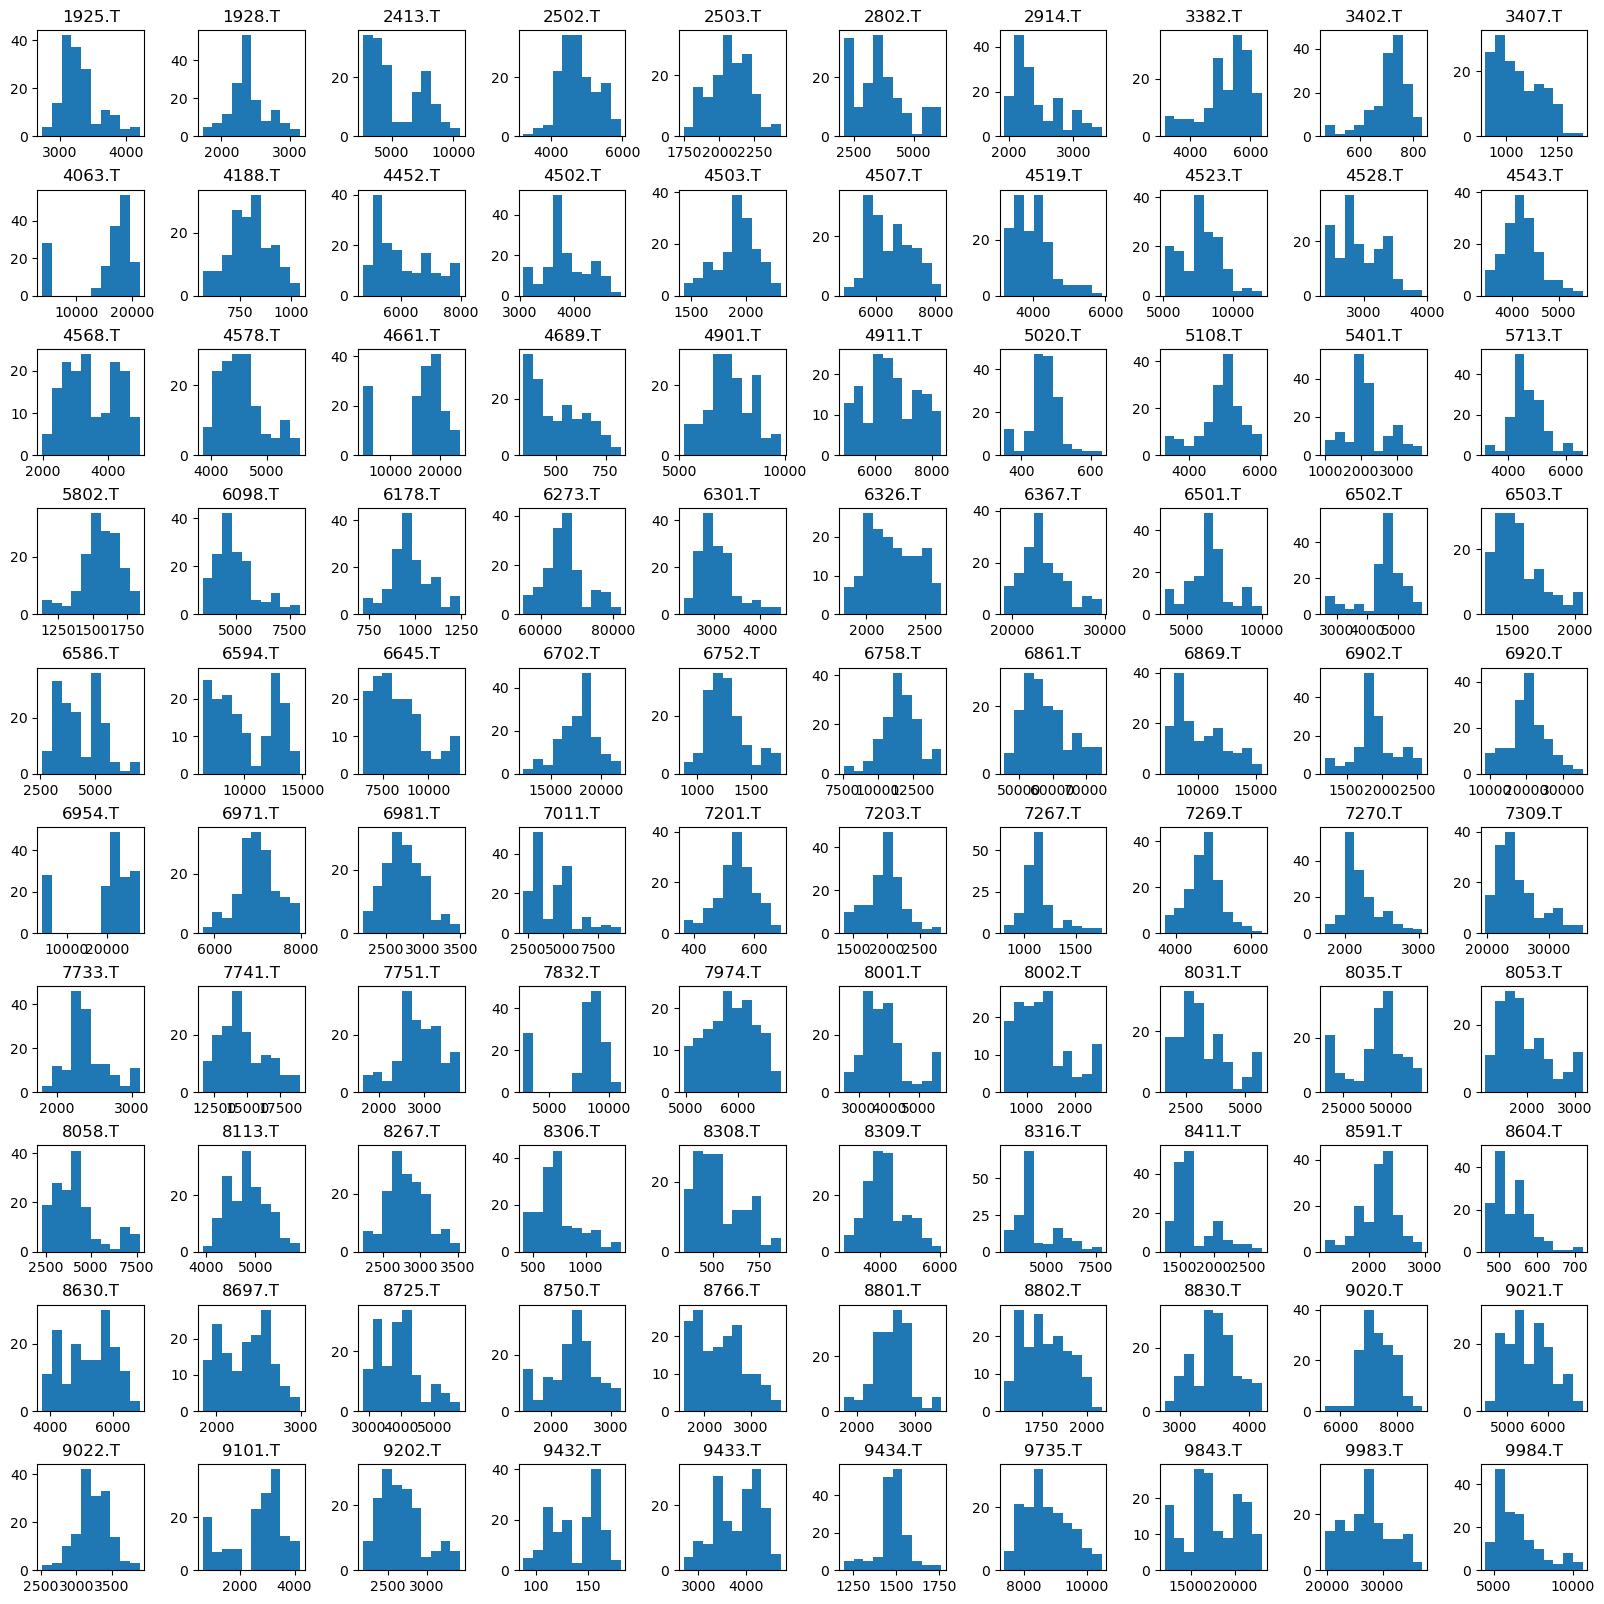

In [172]:
EXCLUDE_COLUMNS = ['Date'] + markets
plot_histograms(all_df_weekly, EXCLUDE_COLUMNS)

In [174]:
all_df_monthly.describe()

,1925.T,1928.T,2413.T,2502.T,2503.T,2802.T,2914.T,3382.T,3402.T,3407.T,4063.T,4188.T,4452.T,4502.T,4503.T,4507.T,4519.T,4523.T,4528.T,4543.T,4568.T,4578.T,4661.T,4689.T,4901.T,4911.T,5020.T,5108.T,5401.T,5713.T,5802.T,6098.T,6178.T,6273.T,6301.T,6326.T,6367.T,6501.T,6502.T,6503.T,6586.T,6594.T,6645.T,6702.T,6752.T,6758.T,6861.T,6869.T,6902.T,6920.T,6954.T,6971.T,6981.T,7011.T,7201.T,7203.T,7267.T,7269.T,7270.T,7309.T,7733.T,7741.T,7751.T,7832.T,7974.T,8001.T,8002.T,8031.T,8035.T,8053.T,8058.T,8113.T,8267.T,8306.T,8308.T,8309.T,8316.T,8411.T,8591.T,8604.T,8630.T,8697.T,8725.T,8750.T,8766.T,8801.T,8802.T,8830.T,9020.T,9021.T,9022.T,9101.T,9202.T,9432.T,9433.T,9434.T,9735.T,9843.T,9983.T,9984.T,TOPIX100.T,1475.T
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,108.000000,95.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,58.000000,120.000000,120.000000,120.000000,120.000000,44.000000,96.000000
mean,3140.504167,1994.612500,2947.825000,4347.650000,2066.783333,2600.008333,3083.616667,4673.27500,814.030835,1048.531669,10838.508333,765.023333,6412.716667,4592.608333,1696.795000,5568.350000,2571.363889,7049.912500,2732.191667,2974.558333,1943.650002,4413.204167,11167.545833,467.623333,5297.095833,5159.737500,505.041669,4416.741667,2283.236667,3687.283333,1562.283333,3266.615740,1136.009471,45697.458333,2722.450000,1875.683333,14745.708333,4512.741667,3776.791667,1474.941667,3905.883333,7052.356250,6072.566667,10583.366667,1248.666666,6576.679167,34645.520833,7914.891667,1462.747917,7579.793750,20023.441667,6312.154167,2024.919447,4720.366667,830.267500,1548.021668,1125.294446,4492.687500,3079.116667,18736.250000,1529.083333,8585.441667,3195.008333,4951.070833,3832.533333,2397.491667,902.820832,2139.066667,22190.816667,1606.466667,3019.670833,3532.038891,2119.737500,669.032501,538.648335,4178.475000,4260.675000,1850.545833,1820.520833,575.692498,4239.987500,1949.587500,3469.458333,1954.216667,1801.027777,2720.058333,2045.170833,3667.291667,8943.775000,6607.675000,3668.658333,1369.181949,3139.712500,105.919000,3130.233334,1452.396552,8366.316667,14229.833333,19105.555534,4873.295833,1251.379772,1761.906250
std,592.008433,382.881964,2194.442104,793.940319,415.096100,1019.097525,805.940913,734.48556,166.034344,217.008041,4570.021154,178.480519,1469.476823,869.346263,236.005189,1445.150753,1386.608932,1633.376313,658.812132,1147.545656,1304.095399,629.321832,5307.980214,106.541136,1655.335280,2304.717192,96.204289,653.429196,639.420517,888.979078,186.171656,1585.232458,234.333803,15945.872757,571.234445,302.594877,6456.243614,1643.176943,926.864978,201.510193,818.109752,2877.207803,1895.909705,5128.596276,242.477066,3762.967933,18053.057705,2443.002103,376.160286,9339.226896,5192.186008,861.827857,578.410679,1388.419680,281.856549,358.255149,167.240670,1024.483051,888.278818,4975.828644,650.239144,4554.280964,586.849522,2479.062466,1770.044657,1139.757312,432.338783,973.647903,15880.134804,427.836711,1157.829129,1063.994165,611.718996,166.132858,111.542051,669.872862,863.240508,337.296967,346.270796,111.673518,977.058143

In [173]:
all_df_weekly.describe()

,1925.T,1928.T,2413.T,2502.T,2503.T,2802.T,2914.T,3382.T,3402.T,3407.T,4063.T,4188.T,4452.T,4502.T,4503.T,4507.T,4519.T,4523.T,4528.T,4543.T,4568.T,4578.T,4661.T,4689.T,4901.T,4911.T,5020.T,5108.T,5401.T,5713.T,5802.T,6098.T,6178.T,6273.T,6301.T,6326.T,6367.T,6501.T,6502.T,6503.T,6586.T,6594.T,6645.T,6702.T,6752.T,6758.T,6861.T,6869.T,6902.T,6920.T,6954.T,6971.T,6981.T,7011.T,7201.T,7203.T,7267.T,7269.T,7270.T,7309.T,7733.T,7741.T,7751.T,7832.T,7974.T,8001.T,8002.T,8031.T,8035.T,8053.T,8058.T,8113.T,8267.T,8306.T,8308.T,8309.T,8316.T,8411.T,8591.T,8604.T,8630.T,8697.T,8725.T,8750.T,8766.T,8801.T,8802.T,8830.T,9020.T,9021.T,9022.T,9101.T,9202.T,9432.T,9433.T,9434.T,9735.T,9843.T,9983.T,9984.T,TOPIX100.T,1475.T
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,3309.417197,2395.582803,5411.035032,4758.025478,2078.990446,3628.773885,2438.557325,5216.152866,711.354138,1060.204460,15500.121019,799.359235,6075.445860,3856.00000,1917.378981,6500.337580,4021.815287,7706.324841,2940.461783,4222.292994,3496.576433,4540.076433,16121.675159,510.782803,7404.414013,6570.700637,467.680256,4910.630573,2192.455414,4683.089172,1557.643312,5005.802548,972.238217,66802.738854,3078.573248,2218.484076,23389.426752,6498.057325,4522.713376,1551.423567,4281.898089,10152.031847,8376.573248,17759.012739,1279.956051,11631.471338,58131.464968,10233.076433,1904.792994,20347.229299,20025.757962,6986.643312,2751.078568,4322.156051,539.107644,1968.246498,1152.207006,4769.535032,2220.308917,24933.152866,2398.277070,14625.605096,2865.328025,7751.968153,5873.089172,3854.789809,1330.518472,3215.363057,42374.458599,1948.668790,4154.722930,4843.515924,2822.894904,734.201272,536.575798,4154.130573,4453.990446,1705.082803,2164.404459,534.307007,5230.751592,2349.442675,3924.828025,2364.159236,2348.433124,2594.022293,1772.178344,3505.480892,7323.898089,5536.267516,3242.942675,2636.825906,2685.414013,138.220255,3841.121019,1478.544586,8747.636943,17582.834395,27277.377899,6517.254777,1299.457130,2022.254777
std,290.967225,279.078554,2124.361913,518.987080,143.021935,1088.500023,378.551562,774.973070,68.289636,109.391228,5382.805434,104.084552,914.988443,398.59061,187.256503,734.498883,533.494248,1414.479148,347.354224,395.878498,780.653677,399.917901,5497.951801,132.898546,1053.632113,911.079083,46.306976,605.909205,592.346208,585.993102,143.515724,979.401986,109.980547,5445.330346,411.004819,207.521488,2372.090726,1394.487426,706.074296,185.145059,966.483007,2538.984090,1390.819668,1864.508807,188.189468,1319.573113,7033.201009,2178.551217,293.756826,5249.646032,7583.520076,460.348976,267.630083,1518.168455,61.941890,279.951733,165.158456,467.170569,239.115367,3494.722224,281.376381,1736.300901,485.649970,2242.243771,465.143904,773.134896,522.987084,1044.879328,13309.130271,506.066906,1289.490412,396.627297,261.950273,196.995275,127.423966,674.706598,1052.869328,303.677222,327.729442,46.107021,789.035476,290.

### **2.1.2 尖度と歪度**

#### **2.1.2.1 [関数]尖度と歪度ランキング作成**

In [183]:
import pandas as pd

def get_company_name(ticker):
    """
    Return the company name for a given ticker using the ticker_to_name dictionary.
    
    Parameters:
        ticker (str): The ticker symbol.
    
    Returns:
        str: The corresponding company name.
    """
    return ticker_to_name.get(ticker, ticker)

def calculate_rankings(df):
    """
    Calculate and return the top and bottom 10 skewness and kurtosis from a dataframe.
    
    Parameters:
        df (pd.DataFrame): The input dataframe with numerical columns.
    
    Returns:
        pd.DataFrame, pd.DataFrame: Dataframes containing top and bottom 10 skewness and kurtosis.
    """
    
    # 歪度と尖度を計算
    skewness = df.skew()
    kurtosis = df.kurtosis()

    # ソートして上位および下位10の銘柄を取得
    top_10_skewness = skewness.nlargest(10)
    bottom_10_skewness = skewness.nsmallest(10)

    top_10_kurtosis = kurtosis.nlargest(10)
    bottom_10_kurtosis = kurtosis.nsmallest(10)

    # 上位および下位の歪度と尖度をデータフレームにまとめる
    top_df = pd.DataFrame({
        'Top 10 Skewness': top_10_skewness.index + ' (' + top_10_skewness.index.map(get_company_name) + ')',
        'Value (Skew)': top_10_skewness.values,
        'Top 10 Kurtosis': top_10_kurtosis.index + ' (' + top_10_kurtosis.index.map(get_company_name) + ')',
        'Value (Kurt)': top_10_kurtosis.values
    })

    bottom_df = pd.DataFrame({
        'Bottom 10 Skewness': bottom_10_skewness.index + ' (' + bottom_10_skewness.index.map(get_company_name) + ')',
        'Value (Skew)': bottom_10_skewness.values,
        'Bottom 10 Kurtosis': bottom_10_kurtosis.index + ' (' + bottom_10_kurtosis.index.map(get_company_name) + ')',
        'Value (Kurt)': bottom_10_kurtosis.values
    })

    return top_df, bottom_df


#### **2.1.2.2 月次データの尖度・歪度**

In [184]:
# 使用例:
temp_data = all_df_monthly
top_rankings, bottom_rankings = calculate_rankings(temp_data)

print("Top 10:")
print(top_rankings)

print("\nBottom 10:")
print(bottom_rankings)

Top 10:
                          Top 10 Skewness  Value (Skew)  \
0                  8002.T (MARUBENI CORP)      2.118171   
1                    8031.T (MITSUI & CO)      1.999858   
2                8058.T (MITSUBISHI CORP)      1.984299   
3               2802.T (AJINOMOTO CO INC)      1.739191   
4                  8053.T (SUMITOMO CORP)      1.580080   
5             5020.T (ENEOS HOLDINGS INC)      1.480070   
6                         2413.T (M3 INC)      1.389347   
7  9101.T (NIPPON YUSEN KABUSHIKI KAISHA)      1.271368   
8                        6501.T (HITACHI)      1.244663   
9      8766.T (TOKIO MARINE HOLDINGS INC)      1.182221   

                            Top 10 Kurtosis  Value (Kurt)  
0                  8058.T (MITSUBISHI CORP)      4.365343  
1                    8002.T (MARUBENI CORP)      4.267946  
2                      8031.T (MITSUI & CO)      3.568782  
3                6954.T (FANUC CORPORATION)      3.236310  
4                 2802.T (AJINOMOTO CO INC

/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/1276898350.py:27: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/1276898350.py:28: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


#### **2.1.2.3 週次データの尖度・歪度**

In [185]:
# 使用例:
temp_data = all_df_weekly
top_rankings, bottom_rankings = calculate_rankings(temp_data)

print("Top 10:")
print(top_rankings)

print("\nBottom 10:")
print(bottom_rankings)

Top 10:
                            Top 10 Skewness  Value (Skew)  \
0                   7267.T (HONDA MOTOR CO)      1.468244   
1           8411.T (MIZUHO FINANCIAL GROUP)      1.276475   
2             8604.T (NOMURA HOLDINGS INC.)      1.219111   
3              9984.T (SOFTBANK GROUP CORP)      1.191116   
4                          6301.T (KOMATSU)      1.116627   
5  8316.T (SUMITOMO MITSUI FINANCIAL GROUP)      1.090236   
6               7270.T (SUBARU CORPORATION)      1.082514   
7                  8058.T (MITSUBISHI CORP)      1.067855   
8          6098.T (RECRUIT HOLDINGS CO LTD)      1.064825   
9                      7309.T (SHIMANO INC)      1.029278   

                            Top 10 Kurtosis  Value (Kurt)  
0                   7267.T (HONDA MOTOR CO)      2.902882  
1             3402.T (TORAY INDUSTRIES INC)      2.331602  
2                   9434.T (SOFTBANK CORP.)      2.214060  
3               5020.T (ENEOS HOLDINGS INC)      1.941862  
4             8604.T

/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/1276898350.py:27: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_94129/1276898350.py:28: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


## **2.1.3 可視化**

### **2.1.3.1 [関数]折れ線グラフ作成**

In [202]:
import matplotlib.pyplot as plt

def plot_multiple_stocks_time_series(df, tickers, title="Stock Prices Over Time", xlabel='Date', ylabel='Price'):
    """
    Plot the time series for multiple stock tickers.

    Parameters:
        df (pd.DataFrame): The input dataframe containing stock prices.
        tickers (list): List of stock ticker symbols to plot.
        title (str, optional): Title for the plot.
        xlabel (str, optional): Label for the x-axis. Defaults to 'Date'.
        ylabel (str, optional): Label for the y-axis. Defaults to 'Price'.
    """
    
    # Extract Date for x-axis
    dates = df['Date']
    
    # Plotting
    plt.figure(figsize=(14, 7))
    
    for ticker in tickers:
        # Check if the ticker is in the dataframe columns
        if ticker not in df.columns:
            print(f"Ticker {ticker} not found in the dataframe.")
            continue
        
        # Fetch the company name, if not found use the ticker
        company_name = ticker_to_name.get(ticker, ticker)
        plt.plot(dates, df[ticker], label=company_name)

    # Reduce the number of x-axis labels for clarity
    plt.xticks(dates[::len(dates)//10])  # Show only every 10th date
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(tickers))  # Place the legend below the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### **月次データの可視化**

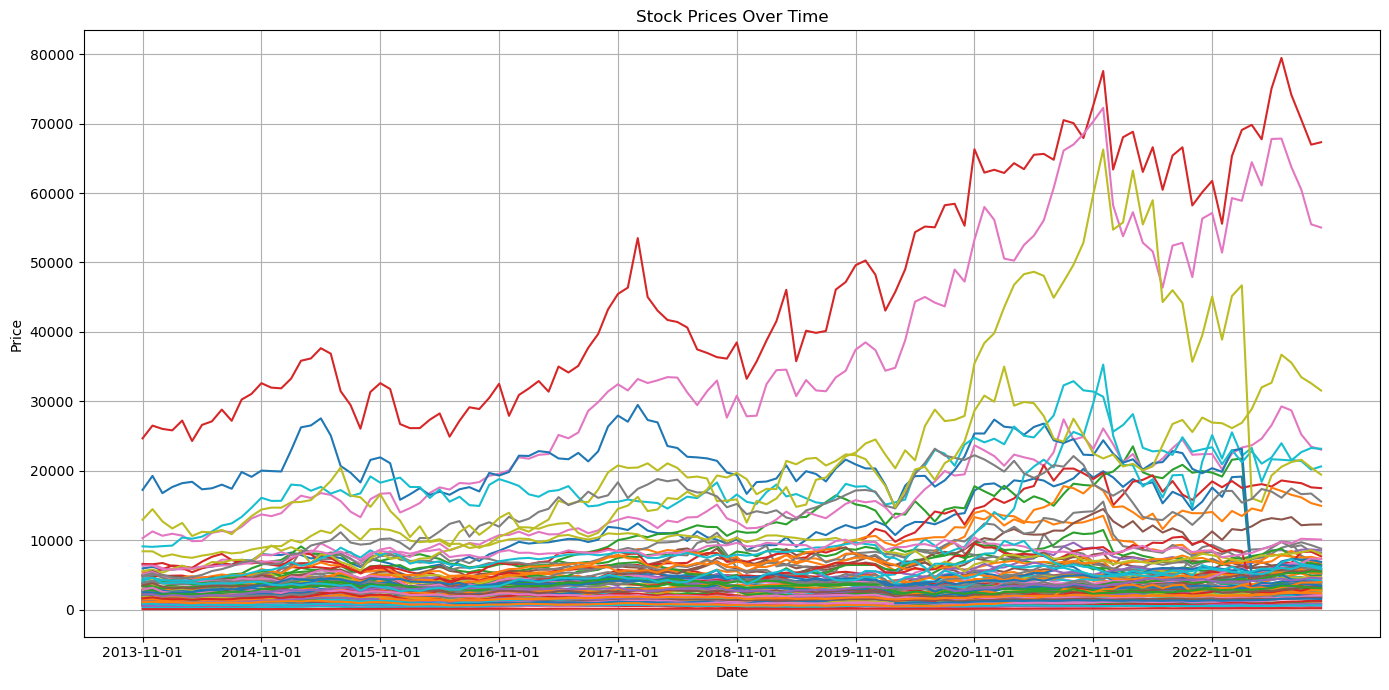

In [200]:
# 使用例:
tickers_to_plot = [i for i in all_tickers]
plot_multiple_stocks_time_series(all_df_monthly, tickers_to_plot)

#### **週次データの可視化**

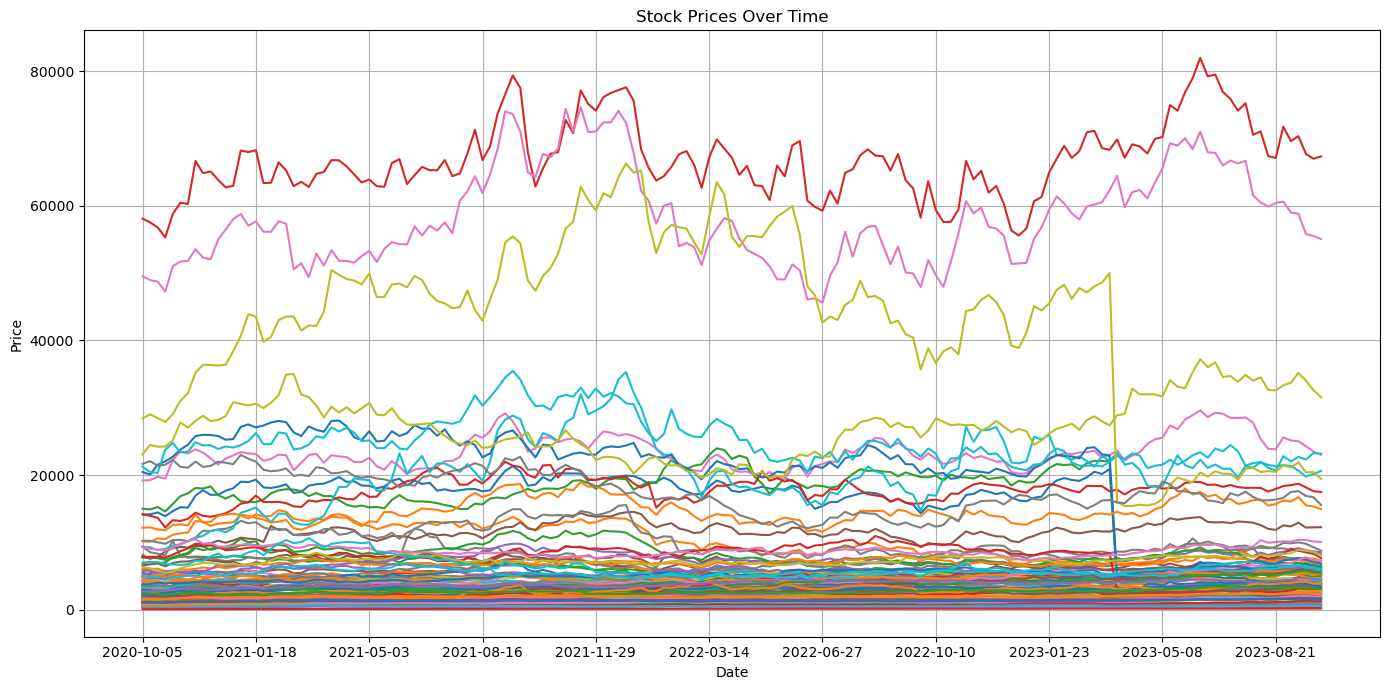

In [201]:
# 使用例:
tickers_to_plot = [i for i in all_tickers]
plot_multiple_stocks_time_series(all_df_weekly, tickers_to_plot)

### **2.1.3.2 [関数]最小最大スケーリング**

In [204]:
def min_max_scaling(df):
    """
    Apply Min-Max Scaling to each column in the dataframe.
    
    Parameters:
        df (pd.DataFrame): Input dataframe with stock prices.

    Returns:
        pd.DataFrame: Scaled dataframe.
    """
    return (df - df.min()) / (df.max() - df.min())

#### **月次データの最大最小スケーリング**

In [205]:
# 使用例:
all_df_monthly_MinMaxScaling = min_max_scaling(all_df_monthly)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### **週次データの最大最小スケーリング**